
0: 736x1280 20 players, 3 referees, 3947.6ms
Speed: 40.2ms preprocess, 3947.6ms inference, 17.7ms postprocess per image at shape (1, 3, 736, 1280)


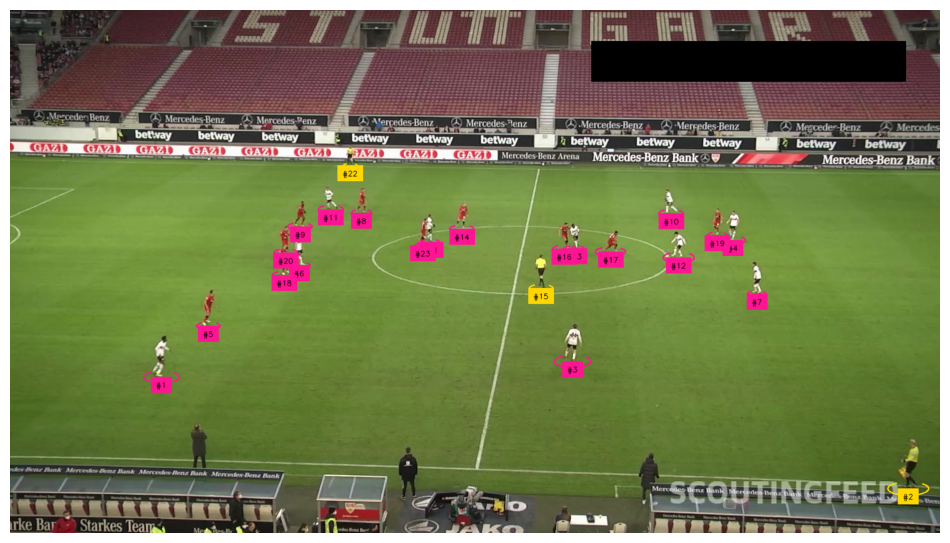

In [92]:
import supervision as sv
from ultralytics import YOLO
SOURCE_VIDEO_PATH = "0bfacc_0.mp4"
BALL_ID = 0
PLAYER_DETECTION_MODEL = YOLO('models/best-3.pt')
ellipse_annotator = sv.EllipseAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    thickness=2
)
label_annotator = sv.LabelAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    text_color=sv.Color.from_hex('#000000'),
    text_position=sv.Position.BOTTOM_CENTER
)
triangle_annotator = sv.TriangleAnnotator(
    color=sv.Color.from_hex('#FFD700'),
    base=25,
    height=21,
    outline_thickness=1
)

tracker = sv.ByteTrack()
tracker.reset()

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
frame = next(frame_generator)

result = PLAYER_DETECTION_MODEL(frame, conf=0.3)[0]
detections = sv.Detections.from_ultralytics(result)

ball_detections = detections[detections.class_id == BALL_ID]
ball_detections.xyxy = sv.pad_boxes(xyxy=ball_detections.xyxy, px=10)

all_detections = detections[detections.class_id != BALL_ID]
all_detections = all_detections.with_nms(threshold=0.5, class_agnostic=True)
all_detections.class_id -= 1
all_detections = tracker.update_with_detections(detections=all_detections)

labels = [
    f"#{tracker_id}"
    for tracker_id
    in all_detections.tracker_id
]

annotated_frame = frame.copy()
annotated_frame = ellipse_annotator.annotate(
    scene=annotated_frame,
    detections=all_detections)
annotated_frame = label_annotator.annotate(
    scene=annotated_frame,
    detections=all_detections,
    labels=labels)
annotated_frame = triangle_annotator.annotate(
    scene=annotated_frame,
    detections=ball_detections)

sv.plot_image(annotated_frame)

In [93]:
from tqdm import tqdm

SOURCE_VIDEO_PATH = "121364_0.mp4"
PLAYER_ID = 2
STRIDE = 30

frame_generator = sv.get_video_frames_generator(
    source_path=SOURCE_VIDEO_PATH, stride=STRIDE)

crops = []
for frame in tqdm(frame_generator, desc='collecting crops'):
    results = PLAYER_DETECTION_MODEL(frame, conf=0.3)[0]
    detections = sv.Detections.from_ultralytics(results)
    detections = detections.with_nms(threshold=0.5, class_agnostic=True)
    detections = detections[detections.class_id == PLAYER_ID]
    players_crops = [sv.crop_image(frame, xyxy) for xyxy in detections.xyxy]
    crops += players_crops

collecting crops: 0it [00:00, ?it/s]


0: 736x1280 1 ball, 1 goalkeeper, 21 players, 2 referees, 3312.2ms
Speed: 6.6ms preprocess, 3312.2ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


collecting crops: 1it [00:03,  3.38s/it]


0: 736x1280 1 goalkeeper, 21 players, 2 referees, 5152.3ms
Speed: 12.9ms preprocess, 5152.3ms inference, 3.0ms postprocess per image at shape (1, 3, 736, 1280)


collecting crops: 2it [00:08,  4.50s/it]


0: 736x1280 1 goalkeeper, 21 players, 2 referees, 4463.0ms
Speed: 16.2ms preprocess, 4463.0ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)


collecting crops: 3it [00:13,  4.56s/it]


0: 736x1280 1 ball, 21 players, 2 referees, 3011.1ms
Speed: 11.7ms preprocess, 3011.1ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


collecting crops: 4it [00:16,  3.98s/it]


0: 736x1280 1 ball, 22 players, 2 referees, 3913.2ms
Speed: 10.8ms preprocess, 3913.2ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


collecting crops: 5it [00:20,  4.00s/it]


0: 736x1280 1 ball, 21 players, 2 referees, 3159.2ms
Speed: 14.9ms preprocess, 3159.2ms inference, 1.0ms postprocess per image at shape (1, 3, 736, 1280)


collecting crops: 6it [00:23,  3.74s/it]


0: 736x1280 23 players, 2 referees, 3832.7ms
Speed: 10.5ms preprocess, 3832.7ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)


collecting crops: 7it [00:27,  3.80s/it]


0: 736x1280 2 balls, 21 players, 2 referees, 3403.2ms
Speed: 22.6ms preprocess, 3403.2ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


collecting crops: 8it [00:31,  3.71s/it]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 3578.2ms
Speed: 11.2ms preprocess, 3578.2ms inference, 1.1ms postprocess per image at shape (1, 3, 736, 1280)


collecting crops: 9it [00:34,  3.70s/it]


0: 736x1280 1 ball, 1 goalkeeper, 21 players, 2 referees, 3450.1ms
Speed: 9.7ms preprocess, 3450.1ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


collecting crops: 10it [00:38,  3.66s/it]


0: 736x1280 2 balls, 1 goalkeeper, 20 players, 2 referees, 3555.6ms
Speed: 10.5ms preprocess, 3555.6ms inference, 1.4ms postprocess per image at shape (1, 3, 736, 1280)


collecting crops: 11it [00:42,  3.66s/it]


0: 736x1280 1 goalkeeper, 21 players, 2 referees, 3704.5ms
Speed: 10.5ms preprocess, 3704.5ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


collecting crops: 12it [00:45,  3.71s/it]


0: 736x1280 1 goalkeeper, 21 players, 2 referees, 3447.5ms
Speed: 11.2ms preprocess, 3447.5ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


collecting crops: 13it [00:49,  3.65s/it]


0: 736x1280 1 ball, 1 goalkeeper, 19 players, 2 referees, 3315.7ms
Speed: 12.0ms preprocess, 3315.7ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)


collecting crops: 14it [00:52,  3.59s/it]


0: 736x1280 21 players, 2 referees, 4411.3ms
Speed: 13.8ms preprocess, 4411.3ms inference, 2.4ms postprocess per image at shape (1, 3, 736, 1280)


collecting crops: 15it [00:57,  3.86s/it]


0: 736x1280 21 players, 1 referee, 3925.1ms
Speed: 11.7ms preprocess, 3925.1ms inference, 1.4ms postprocess per image at shape (1, 3, 736, 1280)


collecting crops: 16it [01:01,  3.92s/it]


0: 736x1280 22 players, 2 referees, 3632.9ms
Speed: 20.8ms preprocess, 3632.9ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)


collecting crops: 17it [01:05,  3.87s/it]


0: 736x1280 22 players, 1 referee, 3535.3ms
Speed: 10.0ms preprocess, 3535.3ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


collecting crops: 18it [01:08,  3.80s/it]


0: 736x1280 22 players, 2 referees, 3123.4ms
Speed: 10.8ms preprocess, 3123.4ms inference, 1.4ms postprocess per image at shape (1, 3, 736, 1280)


collecting crops: 19it [01:11,  3.62s/it]


0: 736x1280 22 players, 2 referees, 3071.3ms
Speed: 11.0ms preprocess, 3071.3ms inference, 1.1ms postprocess per image at shape (1, 3, 736, 1280)


collecting crops: 20it [01:15,  3.49s/it]


0: 736x1280 1 goalkeeper, 23 players, 2 referees, 3877.6ms
Speed: 11.3ms preprocess, 3877.6ms inference, 2.7ms postprocess per image at shape (1, 3, 736, 1280)


collecting crops: 21it [01:19,  3.65s/it]


0: 736x1280 1 goalkeeper, 21 players, 2 referees, 4638.0ms
Speed: 24.5ms preprocess, 4638.0ms inference, 2.0ms postprocess per image at shape (1, 3, 736, 1280)


collecting crops: 22it [01:23,  4.00s/it]


0: 736x1280 2 balls, 1 goalkeeper, 22 players, 2 referees, 3954.5ms
Speed: 13.3ms preprocess, 3954.5ms inference, 1.8ms postprocess per image at shape (1, 3, 736, 1280)


collecting crops: 23it [01:28,  4.02s/it]


0: 736x1280 23 players, 2 referees, 4077.8ms
Speed: 9.7ms preprocess, 4077.8ms inference, 2.3ms postprocess per image at shape (1, 3, 736, 1280)


collecting crops: 24it [01:32,  4.06s/it]


0: 736x1280 1 goalkeeper, 21 players, 2 referees, 3026.7ms
Speed: 21.1ms preprocess, 3026.7ms inference, 1.1ms postprocess per image at shape (1, 3, 736, 1280)


collecting crops: 25it [01:35,  3.81s/it]


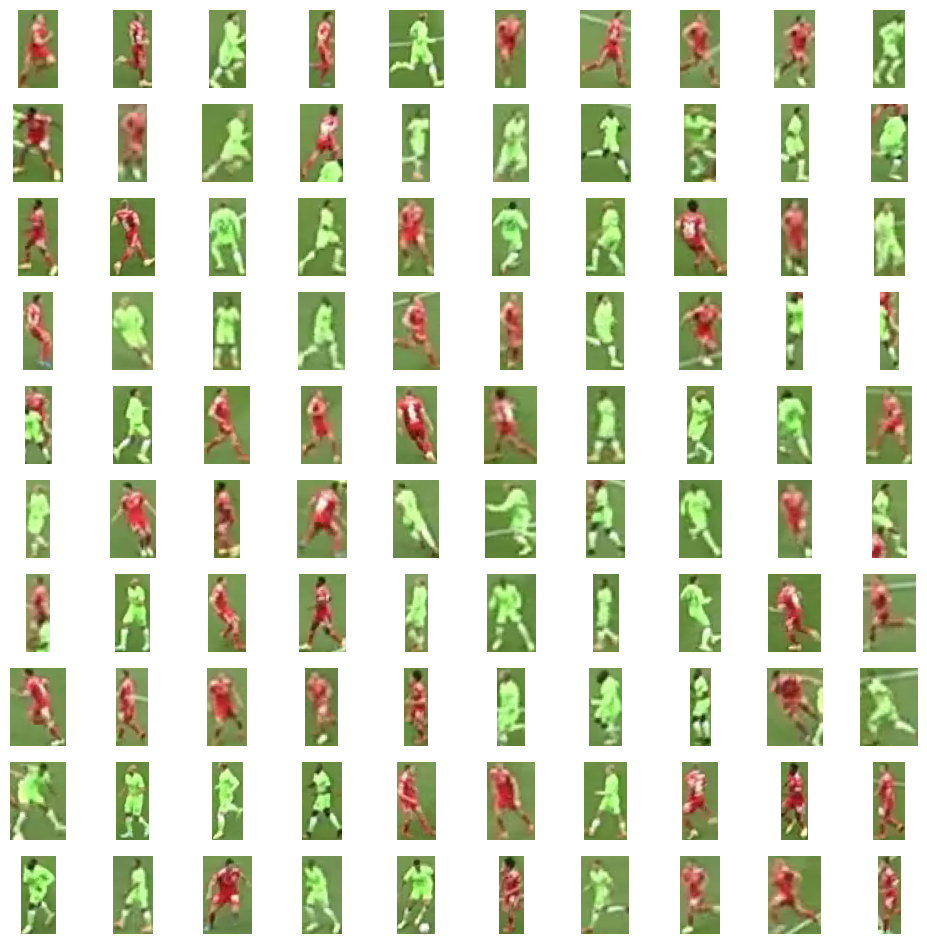

In [94]:
sv.plot_images_grid(crops[:100], grid_size=(10, 10))

In [95]:
import torch
from transformers import AutoProcessor, SiglipVisionModel
import numpy as np
import umap
from sklearn.cluster import KMeans
from more_itertools import chunked

SIGLIP_MODEL_PATH = 'google/siglip-base-patch16-224'

DEVICE = 'mps'
EMBEDDINGS_MODEL = SiglipVisionModel.from_pretrained(SIGLIP_MODEL_PATH).to(DEVICE)
EMBEDDINGS_PROCESSOR = AutoProcessor.from_pretrained(SIGLIP_MODEL_PATH)


BATCH_SIZE = 32

crops = [sv.cv2_to_pillow(crop) for crop in crops]
batches = chunked(crops, BATCH_SIZE)
data = []
with torch.no_grad():
    for batch in tqdm(batches, desc='embedding extraction'):
        inputs = EMBEDDINGS_PROCESSOR(images=batch, return_tensors="pt").to(DEVICE)
        outputs = EMBEDDINGS_MODEL(**inputs)
        embeddings = torch.mean(outputs.last_hidden_state, dim=1).cpu().numpy()
        data.append(embeddings)

data = np.concatenate(data)


REDUCER = umap.UMAP(n_components=3)
CLUSTERING_MODEL = KMeans(n_clusters=2)

embedding extraction: 16it [00:38,  2.42s/it]


In [96]:
projections = REDUCER.fit_transform(data)
clusters = CLUSTERING_MODEL.fit_predict(projections)

/Users/manasganti/anaconda3/envs/soccer/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # needed for 3D projection

def display_projections_matplotlib(labels, projections):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')

    scatter = ax.scatter(
        projections[:, 0],
        projections[:, 1],
        projections[:, 2],
        c=labels,
        cmap='tab10',
        s=20
    )

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('3D Embedding Visualization')
    plt.show()

display_projections_matplotlib(clusters, projections)

In [98]:
from typing import Generator, Iterable, List, TypeVar

import numpy as np
import supervision as sv
import torch
import umap
from sklearn.cluster import KMeans
from tqdm import tqdm
from transformers import AutoProcessor, SiglipVisionModel

V = TypeVar("V")

SIGLIP_MODEL_PATH = 'google/siglip-base-patch16-224'


def create_batches(
    sequence: Iterable[V], batch_size: int
) -> Generator[List[V], None, None]:
    """
    Generate batches from a sequence with a specified batch size.

    Args:
        sequence (Iterable[V]): The input sequence to be batched.
        batch_size (int): The size of each batch.

    Yields:
        Generator[List[V], None, None]: A generator yielding batches of the input
            sequence.
    """
    batch_size = max(batch_size, 1)
    current_batch = []
    for element in sequence:
        if len(current_batch) == batch_size:
            yield current_batch
            current_batch = []
        current_batch.append(element)
    if current_batch:
        yield current_batch


class TeamClassifier:
    """
    A classifier that uses a pre-trained SiglipVisionModel for feature extraction,
    UMAP for dimensionality reduction, and KMeans for clustering.
    """
    def __init__(self, device: str = 'cpu', batch_size: int = 32):
        """
       Initialize the TeamClassifier with device and batch size.

       Args:
           device (str): The device to run the model on ('cpu' or 'cuda').
           batch_size (int): The batch size for processing images.
       """
        self.device = device
        self.batch_size = batch_size
        self.features_model = SiglipVisionModel.from_pretrained(
            SIGLIP_MODEL_PATH).to(device)
        self.processor = AutoProcessor.from_pretrained(SIGLIP_MODEL_PATH)
        self.reducer = umap.UMAP(n_components=3)
        self.cluster_model = KMeans(n_clusters=2)

    def extract_features(self, crops: List[np.ndarray]) -> np.ndarray:
        """
        Extract features from a list of image crops using the pre-trained
            SiglipVisionModel.

        Args:
            crops (List[np.ndarray]): List of image crops.

        Returns:
            np.ndarray: Extracted features as a numpy array.
        """
        crops = [sv.cv2_to_pillow(crop) for crop in crops]
        batches = create_batches(crops, self.batch_size)
        data = []
        with torch.no_grad():
            for batch in tqdm(batches, desc='Embedding extraction'):
                inputs = self.processor(
                    images=batch, return_tensors="pt").to(self.device)
                outputs = self.features_model(**inputs)
                embeddings = torch.mean(outputs.last_hidden_state, dim=1).cpu().numpy()
                data.append(embeddings)

        return np.concatenate(data)

    def fit(self, crops: List[np.ndarray]) -> None:
        """
        Fit the classifier model on a list of image crops.

        Args:
            crops (List[np.ndarray]): List of image crops.
        """
        data = self.extract_features(crops)
        projections = self.reducer.fit_transform(data)
        self.cluster_model.fit(projections)

    def predict(self, crops: List[np.ndarray]) -> np.ndarray:
        """
        Predict the cluster labels for a list of image crops.

        Args:
            crops (List[np.ndarray]): List of image crops.

        Returns:
            np.ndarray: Predicted cluster labels.
        """
        if len(crops) == 0:
            return np.array([])

        data = self.extract_features(crops)
        projections = self.reducer.transform(data)
        return self.cluster_model.predict(projections)

In [99]:
frame_generator = sv.get_video_frames_generator(
    source_path=SOURCE_VIDEO_PATH, stride=STRIDE)

crops = []
for frame in tqdm(frame_generator, desc='collecting crops'):
    result = PLAYER_DETECTION_MODEL(frame, conf=0.3)[0]
    detections = sv.Detections.from_ultralytics(result)
    players_detections = detections[detections.class_id == 2]
    players_crops = [sv.crop_image(frame, xyxy) for xyxy in detections.xyxy]
    crops += players_crops

team_classifier = TeamClassifier(device="mps")
team_classifier.fit(crops)

collecting crops: 0it [00:00, ?it/s]


0: 736x1280 1 ball, 1 goalkeeper, 21 players, 2 referees, 4903.4ms
Speed: 16.4ms preprocess, 4903.4ms inference, 2.1ms postprocess per image at shape (1, 3, 736, 1280)


collecting crops: 1it [00:04,  4.99s/it]


0: 736x1280 1 goalkeeper, 21 players, 2 referees, 4498.4ms
Speed: 11.4ms preprocess, 4498.4ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


collecting crops: 2it [00:09,  4.76s/it]


0: 736x1280 1 goalkeeper, 21 players, 2 referees, 4241.2ms
Speed: 18.3ms preprocess, 4241.2ms inference, 1.7ms postprocess per image at shape (1, 3, 736, 1280)


collecting crops: 3it [00:13,  4.58s/it]


0: 736x1280 1 ball, 21 players, 2 referees, 4412.3ms
Speed: 13.1ms preprocess, 4412.3ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


collecting crops: 4it [00:18,  4.56s/it]


0: 736x1280 1 ball, 22 players, 2 referees, 3998.5ms
Speed: 11.0ms preprocess, 3998.5ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


collecting crops: 5it [00:22,  4.40s/it]


0: 736x1280 1 ball, 21 players, 2 referees, 4364.3ms
Speed: 10.5ms preprocess, 4364.3ms inference, 1.9ms postprocess per image at shape (1, 3, 736, 1280)


collecting crops: 6it [00:27,  4.42s/it]


0: 736x1280 23 players, 2 referees, 5074.5ms
Speed: 15.9ms preprocess, 5074.5ms inference, 2.0ms postprocess per image at shape (1, 3, 736, 1280)


collecting crops: 7it [00:32,  4.69s/it]


0: 736x1280 2 balls, 21 players, 2 referees, 3825.8ms
Speed: 37.1ms preprocess, 3825.8ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


collecting crops: 8it [00:36,  4.46s/it]


0: 736x1280 1 goalkeeper, 20 players, 2 referees, 3435.1ms
Speed: 12.2ms preprocess, 3435.1ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


collecting crops: 9it [00:39,  4.17s/it]


0: 736x1280 1 ball, 1 goalkeeper, 21 players, 2 referees, 3214.2ms
Speed: 10.6ms preprocess, 3214.2ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


collecting crops: 10it [00:43,  3.91s/it]


0: 736x1280 2 balls, 1 goalkeeper, 20 players, 2 referees, 4811.3ms
Speed: 10.5ms preprocess, 4811.3ms inference, 4.1ms postprocess per image at shape (1, 3, 736, 1280)


collecting crops: 11it [00:48,  4.22s/it]


0: 736x1280 1 goalkeeper, 21 players, 2 referees, 4312.1ms
Speed: 14.1ms preprocess, 4312.1ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


collecting crops: 12it [00:52,  4.29s/it]


0: 736x1280 1 goalkeeper, 21 players, 2 referees, 3130.4ms
Speed: 13.2ms preprocess, 3130.4ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)


collecting crops: 13it [00:55,  3.96s/it]


0: 736x1280 1 ball, 1 goalkeeper, 19 players, 2 referees, 3095.8ms
Speed: 9.7ms preprocess, 3095.8ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


collecting crops: 14it [00:58,  3.73s/it]


0: 736x1280 21 players, 2 referees, 3147.3ms
Speed: 10.0ms preprocess, 3147.3ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


collecting crops: 15it [01:02,  3.58s/it]


0: 736x1280 21 players, 1 referee, 3047.5ms
Speed: 9.2ms preprocess, 3047.5ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


collecting crops: 16it [01:05,  3.45s/it]


0: 736x1280 22 players, 2 referees, 3141.8ms
Speed: 20.5ms preprocess, 3141.8ms inference, 1.1ms postprocess per image at shape (1, 3, 736, 1280)


collecting crops: 17it [01:08,  3.39s/it]


0: 736x1280 22 players, 1 referee, 3084.0ms
Speed: 11.3ms preprocess, 3084.0ms inference, 1.1ms postprocess per image at shape (1, 3, 736, 1280)


collecting crops: 18it [01:11,  3.34s/it]


0: 736x1280 22 players, 2 referees, 3097.4ms
Speed: 10.4ms preprocess, 3097.4ms inference, 1.5ms postprocess per image at shape (1, 3, 736, 1280)


collecting crops: 19it [01:14,  3.29s/it]


0: 736x1280 22 players, 2 referees, 3133.6ms
Speed: 12.4ms preprocess, 3133.6ms inference, 1.1ms postprocess per image at shape (1, 3, 736, 1280)


collecting crops: 20it [01:18,  3.28s/it]


0: 736x1280 1 goalkeeper, 23 players, 2 referees, 3140.5ms
Speed: 10.7ms preprocess, 3140.5ms inference, 2.7ms postprocess per image at shape (1, 3, 736, 1280)


collecting crops: 21it [01:21,  3.27s/it]


0: 736x1280 1 goalkeeper, 21 players, 2 referees, 3132.2ms
Speed: 11.8ms preprocess, 3132.2ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


collecting crops: 22it [01:24,  3.25s/it]


0: 736x1280 2 balls, 1 goalkeeper, 22 players, 2 referees, 3060.5ms
Speed: 9.5ms preprocess, 3060.5ms inference, 1.2ms postprocess per image at shape (1, 3, 736, 1280)


collecting crops: 23it [01:27,  3.22s/it]


0: 736x1280 23 players, 2 referees, 3125.1ms
Speed: 11.1ms preprocess, 3125.1ms inference, 1.3ms postprocess per image at shape (1, 3, 736, 1280)


collecting crops: 24it [01:31,  3.22s/it]


0: 736x1280 1 goalkeeper, 21 players, 2 referees, 3086.5ms
Speed: 10.8ms preprocess, 3086.5ms inference, 1.1ms postprocess per image at shape (1, 3, 736, 1280)


collecting crops: 25it [01:34,  3.77s/it]
Embedding extraction: 19it [00:37,  1.96s/it]
/Users/manasganti/anaconda3/envs/soccer/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

